In [1]:
import pandas as pd
import json

# Load JSON file, handling multiple objects or lines
try:
    # Attempt to read as a single object
    with open("/content/AMAZON_FASHION_5.json", 'r') as f:
        df = pd.DataFrame([json.loads(line) for line in f])  # If file has one JSON object per line
except json.JSONDecodeError:
    # If that fails, try reading as a list of objects
    with open("/content/AMAZON_FASHION_5.json", 'r') as f:
        data = json.load(f)
        df = pd.DataFrame(data)
except (TypeError, ValueError):
    # If that also fails, handle malformed JSON
    with open("/content/AMAZON_FASHION_5.json", 'r') as f:
        content = f.read()
        content = re.sub(r'\s+', '', content)  # Remove whitespace, line breaks, tabs
        content = re.sub(r'}{', '}, {', content[1:-1])  # Split to valid JSON objects
        df = pd.read_json("[" + content + "]", orient="records")



# Save as CSV
df.to_csv("AMAZON_FASHION_5.csv", index=False)

print("Conversion complete! File saved as output.csv")

Conversion complete! File saved as output.csv


In [11]:
import nltk

# Force download of missing resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')  # Needed for some NLP tasks

# Manually delete and redownload 'punkt' to fix corruption
import shutil
nltk.data.path.append("/usr/local/nltk_data/")  # Ensure path is correct

punkt_path = nltk.data.find("tokenizers/punkt")
shutil.rmtree(punkt_path)  # Delete corrupted file
nltk.download('punkt')  # Re-download


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
import nltk
import shutil

# Remove corrupted NLTK files
nltk_path = nltk.data.find("tokenizers/punkt")
shutil.rmtree(nltk_path)

# Redownload 'punkt'
nltk.download('punkt')


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/usr/local/nltk_data/'
**********************************************************************


In [14]:
!pip install nltk
import nltk
import shutil

# Download 'punkt' if not already present:
try:
    nltk.data.find("tokenizers/punkt")
except LookupError:
    nltk.download('punkt')
    print("Downloaded 'punkt' data.")
else:
    print("'punkt' data already present.")


# Rest of the code where you use 'punkt' (e.g., word_tokenize)

Downloaded 'punkt' data.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
import nltk
import shutil

# Download 'punkt_tab' if not already present:
try:
    nltk.data.find("tokenizers/punkt_tab")
except LookupError:
    nltk.download('punkt_tab')
    print("Downloaded 'punkt_tab' data.")
else:
    print("'punkt_tab' data already present.")

# ... (Rest of your code) ...

Downloaded 'punkt_tab' data.


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [19]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from datetime import datetime, timedelta
import re
from collections import defaultdict
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

class SentimentAnalyzer:
    def __init__(self):
        # Download required NLTK data
        nltk.download('punkt')
        nltk.download('stopwords')
        nltk.download('averaged_perceptron_tagger')
        # Download the missing resource
        nltk.download('averaged_perceptron_tagger_eng')

        self.stop_words = set(stopwords.words('english'))

    def clean_text(self, text):
        """Clean and preprocess text data"""
        if isinstance(text, str):
            # Convert to lowercase
            text = text.lower()
            # Remove special characters and digits
            text = re.sub(r'[^a-zA-Z\s]', '', text)
            # Remove extra whitespace
            text = ' '.join(text.split())
            return text
        return ''

    def analyze_sentiment(self, text):
        """Analyze sentiment of given text"""
        cleaned_text = self.clean_text(text)
        blob = TextBlob(cleaned_text)

        # Get sentiment scores
        polarity = blob.sentiment.polarity
        subjectivity = blob.sentiment.subjectivity

        # Determine sentiment category
        if polarity > 0:
            sentiment = 'positive'
        elif polarity < 0:
            sentiment = 'negative'
        else:
            sentiment = 'neutral'

        return {
            'polarity': polarity,
            'subjectivity': subjectivity,
            'sentiment': sentiment
        }

    def extract_features(self, text):
        """Extract key features and topics from text"""
        cleaned_text = self.clean_text(text)
        tokens = word_tokenize(cleaned_text)

        # Remove stopwords and short words
        words = [word for word in tokens if word not in self.stop_words and len(word) > 2]

        # Get parts of speech
        pos_tags = nltk.pos_tag(words)

        # Extract nouns (potential topics)
        topics = [word for word, pos in pos_tags if pos.startswith('NN')]

        return {
            'topics': topics,
            'word_count': len(tokens)
        }

    def analyze_feedback(self, feedback_data):
        """Process batch of feedback data"""
        results = []

        for idx, row in feedback_data.iterrows():
            text = row['text']
            timestamp = row.get('timestamp', datetime.now())

            # Get sentiment analysis
            sentiment_results = self.analyze_sentiment(text)

            # Get feature extraction
            feature_results = self.extract_features(text)

            # Combine results
            analysis = {
                'text': text,
                'timestamp': timestamp,
                **sentiment_results,
                **feature_results
            }

            results.append(analysis)

        return pd.DataFrame(results)

    def generate_insights(self, analyzed_data):
        """Generate insights from analyzed data"""
        insights = {
            'overall_sentiment': {
                'positive': len(analyzed_data[analyzed_data['sentiment'] == 'positive']) / len(analyzed_data),
                'neutral': len(analyzed_data[analyzed_data['sentiment'] == 'neutral']) / len(analyzed_data),
                'negative': len(analyzed_data[analyzed_data['sentiment'] == 'negative']) / len(analyzed_data)
            },
            'average_polarity': analyzed_data['polarity'].mean(),
            'average_subjectivity': analyzed_data['subjectivity'].mean(),
            'common_topics': self.get_common_topics(analyzed_data),
            'sentiment_trend': self.calculate_sentiment_trend(analyzed_data)
        }

        return insights

    def get_common_topics(self, analyzed_data, top_n=10):
        """Extract most common topics"""
        topic_counts = defaultdict(int)

        for topics in analyzed_data['topics']:
            for topic in topics:
                topic_counts[topic] += 1

        return dict(sorted(topic_counts.items(), key=lambda x: x[1], reverse=True)[:top_n])

    def calculate_sentiment_trend(self, analyzed_data):
        """Calculate sentiment trends over time"""
        analyzed_data = analyzed_data.sort_values('timestamp')
        analyzed_data.set_index('timestamp', inplace=True)

        # Resample by day and calculate mean polarity
        daily_sentiment = analyzed_data['polarity'].resample('D').mean()

        return daily_sentiment.to_dict()

# Example usage
if __name__ == "__main__":

    dataset_path = "/content/AMAZON_FASHION_5.csv"

    feedback_data = pd.read_csv(dataset_path)

    if 'reviewText' in feedback_data.columns:
        feedback_data = feedback_data.rename(columns={'reviewText': 'text'})
    else:
        potential_text_columns = ['review_text', 'comment', 'feedback']
        for col in potential_text_columns:
            if col in feedback_data.columns:
                feedback_data = feedback_data.rename(columns={col: 'text'})
                break
        else:
            raise KeyError("No suitable text column found in the dataset. "
                           "Please ensure your dataset has a column containing text data "
                           "and rename it to 'text' or update the code to use the correct column name.")


    # Initialize analyzer
    analyzer = SentimentAnalyzer()

    # Process the dataset
    results = analyzer.analyze_feedback(feedback_data)

    # Generate insights
    insights = analyzer.generate_insights(results)

    # Print results
    print("Analysis complete!")
    print("\nSentiment Distribution:")
    print(insights['overall_sentiment'])
    print("\nMost Common Topics:")
    print(insights['common_topics'])



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Analysis complete!

Sentiment Distribution:
{'positive': 0.871536523929471, 'neutral': 0.06108312342569269, 'negative': 0.06738035264483627}

Most Common Topics:
{'shoes': 1302, 'size': 644, 'shoe': 600, 'fit': 462, 'feet': 459, 'love': 433, 'pair': 300, 'support': 292, 'day': 233, 'time': 225}


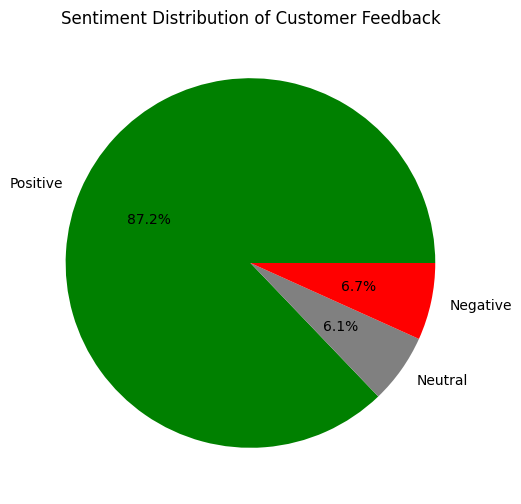

In [20]:
import matplotlib.pyplot as plt

# Extract sentiment counts
sentiment_labels = ['Positive', 'Neutral', 'Negative']
sentiment_values = [
    insights['overall_sentiment']['positive'],
    insights['overall_sentiment']['neutral'],
    insights['overall_sentiment']['negative']
]

# Plot
plt.figure(figsize=(6, 6))
plt.pie(sentiment_values, labels=sentiment_labels, autopct='%1.1f%%', colors=['green', 'gray', 'red'])
plt.title("Sentiment Distribution of Customer Feedback")
plt.show()


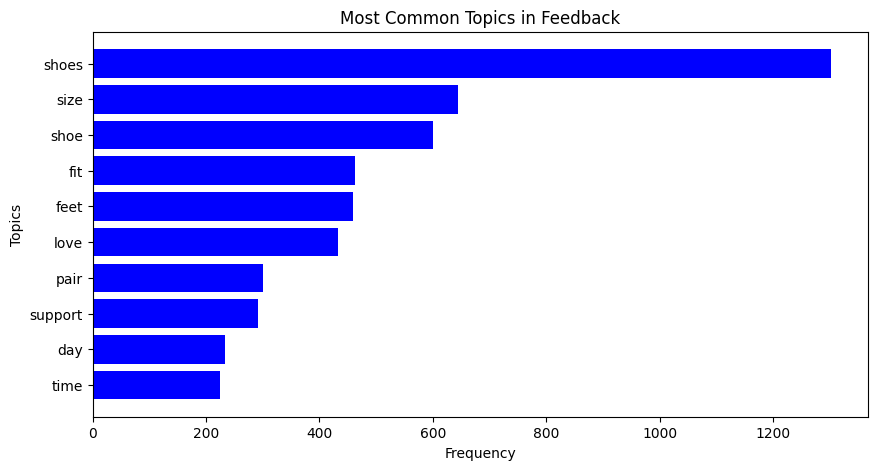

In [21]:
# Extract topics and counts
topics = list(insights['common_topics'].keys())
counts = list(insights['common_topics'].values())

# Plot
plt.figure(figsize=(10, 5))
plt.barh(topics, counts, color='blue')
plt.xlabel("Frequency")
plt.ylabel("Topics")
plt.title("Most Common Topics in Feedback")
plt.gca().invert_yaxis()  # Invert for better readability
plt.show()


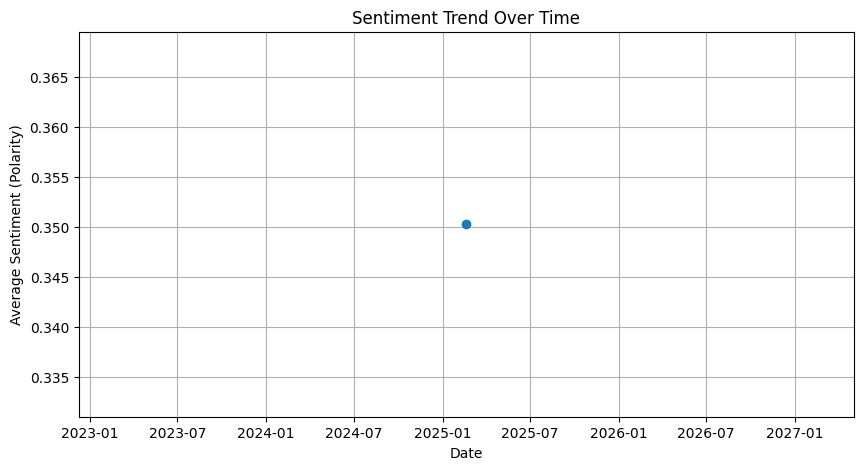

In [22]:
# Extract sentiment trend data
sentiment_trend = insights['sentiment_trend']

# Convert dictionary to DataFrame for plotting
trend_df = pd.DataFrame(sentiment_trend.items(), columns=['Date', 'Average Sentiment'])
trend_df['Date'] = pd.to_datetime(trend_df['Date'])
trend_df.set_index('Date', inplace=True)

# Plot time-series trend
plt.figure(figsize=(10, 5))
plt.plot(trend_df.index, trend_df['Average Sentiment'], marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Average Sentiment (Polarity)")
plt.title("Sentiment Trend Over Time")
plt.grid()
plt.show()


In [2]:
import pandas as pd

# List of file paths
file_paths = [
    "/content/AMAZON_FASHION_5.csv",
    "/content/socialmedia-disaster-tweets-DFE.csv",
    "/content/Instagram - Posts.csv",
    "/content/Instagram - Reels.csv",
    "/content/sentimentdataset.csv",
    "/content/twitter_training.csv",
    "/content/Dataset.xlsx",
    "/content/Twitter+data+in+sheets.xlsx"
]

# Initialize an empty list to store DataFrames
dfs = []

# Load CSV files
for file in file_paths[:-2]:  # The last two files are Excel files
    try:
        df = pd.read_csv(file, encoding="utf-8")
        dfs.append(df)
    except Exception as e:
        print(f"Error loading {file}: {e}")

# Load Excel files
for file in file_paths[-2:]:  # Last two files are Excel
    try:
        xls = pd.ExcelFile(file)
        for sheet_name in xls.sheet_names:
            df = pd.read_excel(xls, sheet_name=sheet_name)
            dfs.append(df)
    except Exception as e:
        print(f"Error loading {file}: {e}")

# Standardize column names
for df in dfs:
    df.columns = df.columns.str.lower().str.replace(" ", "_")  # Normalize column names
    text_columns = [col for col in df.columns if "text" in col or "comment" in col or "review" in col]
    if text_columns:
        df["text"] = df[text_columns[0]]  # Use the first matching column
    else:
        df["text"] = None  # If no text column is found, add an empty one

# Merge all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True, sort=False)

# Keep only relevant columns
combined_df = combined_df[["text"]].dropna().reset_index(drop=True)

# Save the merged dataset
combined_df.to_csv("combined_sentiment_dataset.csv", index=False, encoding="utf-8")

print("Merged dataset saved as 'combined_sentiment_dataset.csv'")


Error loading /content/socialmedia-disaster-tweets-DFE.csv: 'utf-8' codec can't decode byte 0xcc in position 11: invalid continuation byte
Merged dataset saved as 'combined_sentiment_dataset.csv'


In [6]:
import pandas as pd

df = pd.read_csv("combined_sentiment_dataset.csv")
df.head()

,text
0,Great product and price!
1,Great product and price!
2,Great product and price!
3,Great product and price!
4,Great product and price!


In [5]:
import pandas as pd

# List of file paths
file_paths = [
    "/content/AMAZON_FASHION_5.csv",
    "/content/socialmedia-disaster-tweets-DFE.csv",
    "/content/Instagram - Posts.csv",
    "/content/Instagram - Reels.csv",
    "/content/sentimentdataset.csv",
    "/content/twitter_training.csv",
    "/content/Dataset.xlsx",
    "/content/Twitter+data+in+sheets.xlsx"
]

# Initialize an empty list to store DataFrames
dfs = []

# Function to find the best text column dynamically
def get_text_column(df):
    possible_columns = ["text", "reviewText", "comment", "feedback", "message", "content", "post"]
    for col in df.columns:
        if any(keyword in col.lower() for keyword in possible_columns):
            return col  # Return the first matching column
    return None  # Return None if no matching column is found

# Load CSV files
for file in file_paths[:-2]:  # Exclude last two Excel files
    try:
        df = pd.read_csv(file, encoding="utf-8")
        text_col = get_text_column(df)
        if text_col:
            df = df[[text_col]].rename(columns={text_col: "text"})  # Standardize column name
            dfs.append(df)
    except Exception as e:
        print(f"Error loading {file}: {e}")

# Load Excel files
for file in file_paths[-2:]:  # Last two files are Excel
    try:
        xls = pd.ExcelFile(file)
        for sheet_name in xls.sheet_names:
            df = pd.read_excel(xls, sheet_name=sheet_name)
            text_col = get_text_column(df)
            if text_col:
                df = df[[text_col]].rename(columns={text_col: "text"})
                dfs.append(df)
    except Exception as e:
        print(f"Error loading {file}: {e}")

# Merge all DataFrames
combined_df = pd.concat(dfs, ignore_index=True, sort=False)

# Drop missing or empty text values
combined_df = combined_df.dropna(subset=["text"]).reset_index(drop=True)

# Save the merged dataset
output_path = "/content/combined_sentiment_dataset.csv"
combined_df.to_csv(output_path, index=False, encoding="utf-8")

print(f"Merged dataset saved as: {output_path}")


Error loading /content/socialmedia-disaster-tweets-DFE.csv: 'utf-8' codec can't decode byte 0xcc in position 11: invalid continuation byte
Merged dataset saved as: /content/combined_sentiment_dataset.csv
